In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db=mysql.connector.connect(host="localhost",user="root",password="@Amanaman321",database="ecommerce")

In [3]:
cus=db.cursor()

In [4]:
cus.execute("select * from CUSTOMER1") # customer table 1
#data=cus.fetchall()
#print(data)
customer_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(customer_data.head()) # top 5 record

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  


In [5]:
print(customer_data['city'].value_counts())        # city wise customer details

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x2ebcdbaaf90>,
 [Text(0.4844335208866584, 0.9875850160069034, ''),
  Text(-1.0999999999999959, -9.616505800409723e-08, ''),
  Text(-0.0557138249210145, -1.0985881711144858, ''),
  Text(0.9617813019850276, -0.5338321151373202, '')])

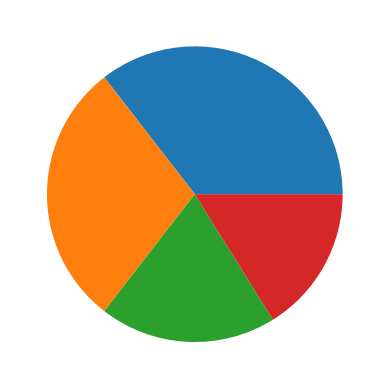

In [6]:
plt.pie(customer_data['city'].value_counts())         # pie diagram of city wise customer details(matplotlib)

Text(0, 0.5, 'Number of Customer')

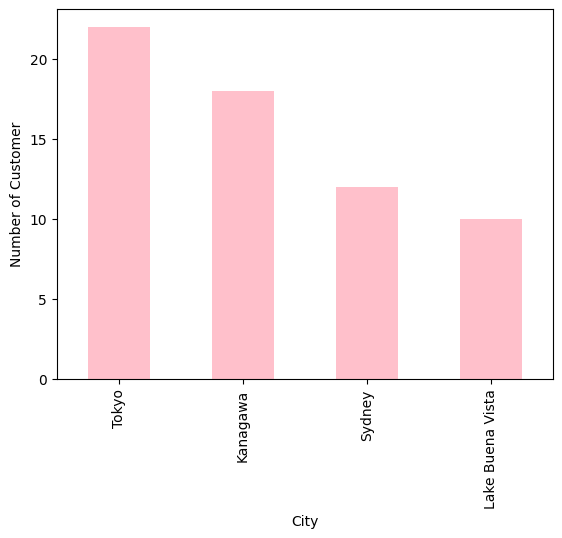

In [7]:
df=(customer_data['city'].value_counts())   # bar diagram of city wise customer details(matplotlib)
df.plot(kind='bar', color='pink')
#df.plot(kind='bar', color='pink')  # kind=bar,line,scatter
plt.xlabel("City")
plt.ylabel("Number of Customer")

In [8]:
cus.execute("select * from PRODUCTS1")  # products table 2
#data=cus.fetchall()
#print(data)
product_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(product_data.head())

  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3       P105      Blender    Appliance  Electronics           500.0   
4       P106    Laptop HP  Electronics    Computers         67200.0   

   selling_price  stock  
0       15000.00     10  
1       55000.00     50  
2       40000.00     20  
3         450.00     10  
4       55000.99     50  


category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of products in each category')

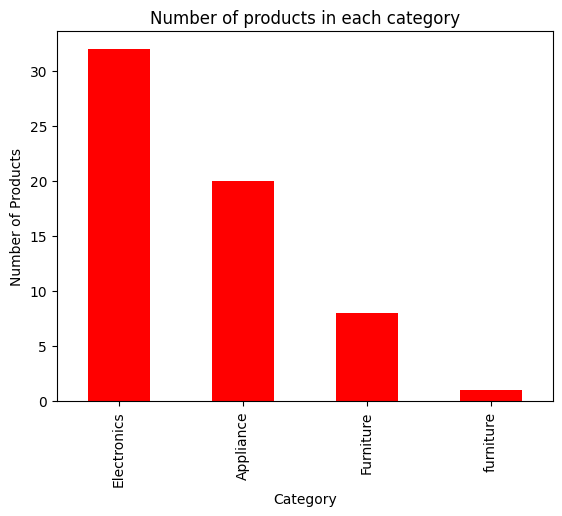

In [9]:
df=product_data['category'].value_counts().head(10) # Counting the number of products in each category.
print(df)
df.plot(kind='bar', color='red')
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Number of products in each category")

sub_category
Electronics      20
Computers         9
Wearables         5
Audio             3
Entertainment     3
Chairs            2
Lamps             2
Accessories       2
Tablets           2
computer          1
Mobiles           1
phone             1
TVs               1
Desks             1
Cameras           1
Sofas             1
Tables            1
chairs            1
Consoles          1
Printers          1
Furniture         1
Photography       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of products across sub category')

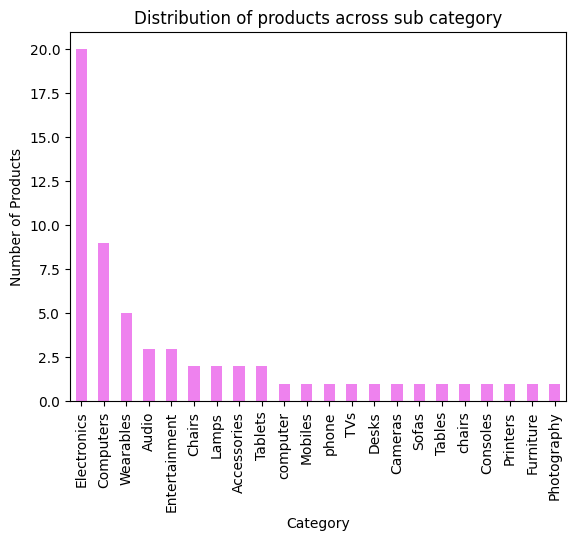

In [10]:
df=product_data['sub_category'].value_counts() # Distribution of products across sub category
print(df)
df.plot(kind='bar', color='violet')
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Distribution of products across sub category")

   product_id product_name     category sub_category  original_price  \
0        P102        Chair    furniture       Chairs         20000.0   
3        P105      Blender    Appliance  Electronics           500.0   
10       P112        chair    Furniture       chairs          1000.0   
30       P132     Sofa Set    Furniture    Furniture         50000.0   
39       P141      Printer  Electronics    Computers         12000.0   
46       P148       Tablet  Electronics    Computers         30000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
10          800.0     10  
30        45000.0     10  
39        10000.0     10  
46        25000.0     10  


Text(0.5, 1.0, ' Products with low stock levels.')

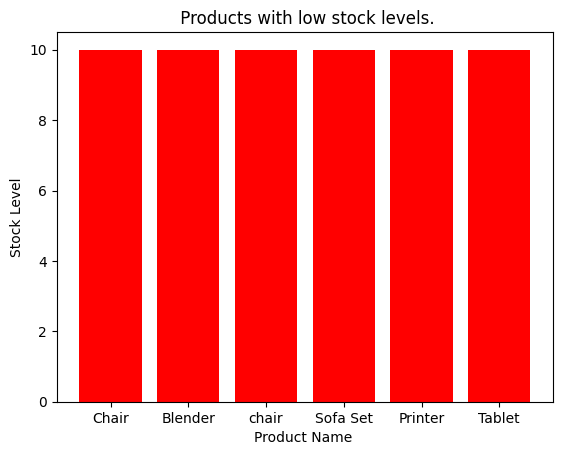

In [11]:
low_stock= 10             #  products with low stock levels.
low_stock_products = product_data[product_data['stock'] <= low_stock]
print(low_stock_products)
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='red')
plt.xlabel("Product Name ")
plt.ylabel("Stock Level")
plt.title(" Products with low stock levels.")

Text(0.5, 1.0, 'Average, Minimum, Maximum Price of Products')

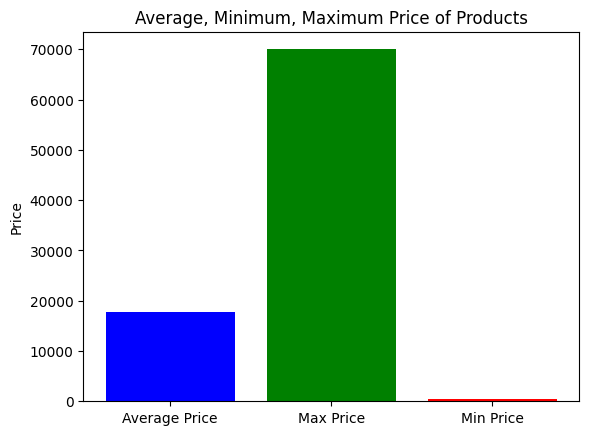

In [12]:
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()
price_summary = pd.DataFrame({
    'Metric': ['Average Price', 'Max Price', 'Min Price'],
    'Value': [average_price, max_price, min_price]
})
plt.bar(price_summary['Metric'], price_summary['Value'], color=['blue', 'green', 'red'])
plt.ylabel("Price")
plt.title("Average, Minimum, Maximum Price of Products")

product_name
Tablet            4
Smartwatch        3
Vacuum Cleaner    3
Desk Lamp         2
Microwave Oven    2
Gaming Console    2
Printer           2
Digital Camera    2
Headphones        2
Television        2
Name: count, dtype: int64


Text(0.5, 1.0, 'Order wise product with product name')

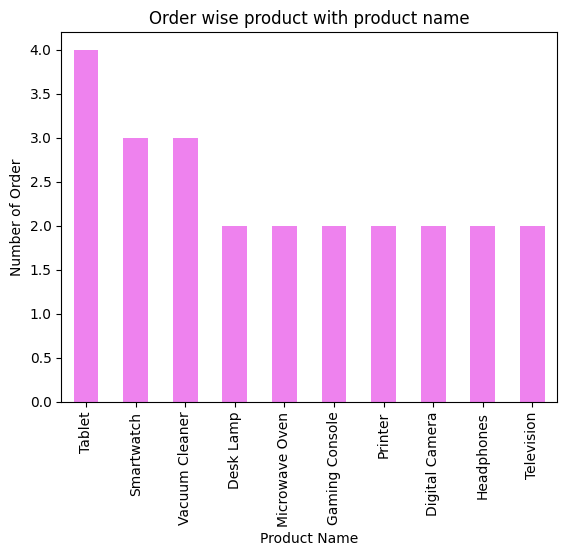

In [13]:
df=product_data['product_name'].value_counts().head(10) # Distribution of products across sub category
print(df)
df.plot(kind='bar', color='violet')
plt.xlabel("Product Name")
plt.ylabel("Number of Order")
plt.title("Order wise product with product name")


In [14]:
cus.execute("select * from order_details1")  # order details table 3
order_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(order_data.head())
# data=cus.fetchall()
# print(data)

   order_id customer_id product_id  quantity  total_price payment_mode  \
0         3       C1004       P112       1.0       1000.0          COD   
1         4       C1005       P102       1.0      20000.0          COD   
2         5       C1005       P102       1.0      20000.0          COD   
3         7       C1006       P103       1.0      55000.0          COD   
4         8       C1006       P102       1.0      15000.0          COD   

  order_date order_status  
0 2023-11-30      Pending  
1 2023-11-30      Pending  
2 2023-12-08    Delivered  
3 2023-12-15    Delivered  
4 2023-12-01    delivered  


customer_id
C1005    3
C1010    3
C1009    3
C1013    3
C1006    2
C1008    2
C1003    2
C1014    2
C1011    2
C1015    2
Name: count, dtype: int64


Text(0, 0.5, 'Number of Orders')

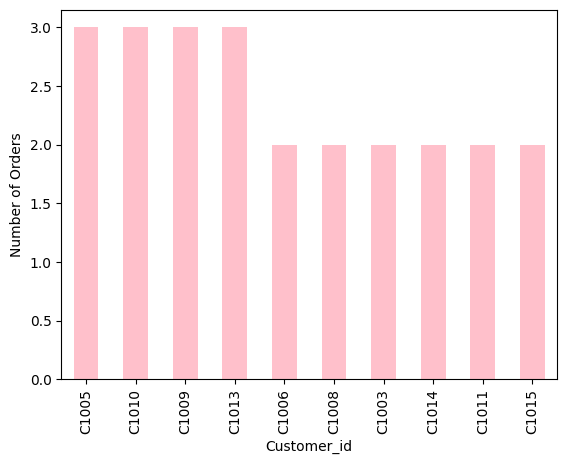

In [15]:
df=order_data['customer_id'].value_counts().head(10) #  Top 10 details , Determine the total number of products(no. of order) available by customer_id.
print(df)
df.plot(kind='bar', color='pink')  # bar diagram
plt.xlabel("Customer_id")
plt.ylabel("Number of Orders")

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64


Text(0.5, 1.0, 'order status distribution')

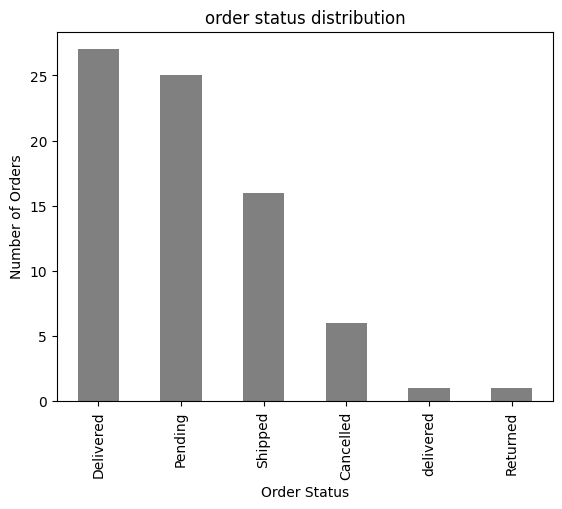

In [18]:
df = order_data['order_status'].value_counts()  # Analyze the order status distribution (e.g., pending, delivered).
print(df)
df.plot(kind='bar', color='grey')  # bar diagram
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title('order status distribution')

           product_name  quantity
0          Air Purifier       4.0
1               Blender       2.0
2     Bluetooth Speaker       3.0
3            Car Vacuum       2.0
4                 Chair       3.0
5          Coffee Maker       4.0
6                  Desk       4.0
7             Desk Lamp       4.0
8        Digital Camera       3.0
9          Dining Table       2.0
10           Dishwasher       1.0
11  Electric Toothbrush       1.0
12  External Hard Drive       2.0
13      Fitness Tracker       4.0
14       Gaming Console       2.0
15         Gaming Mouse       1.0
16           Headphones       3.0
17               Laptop       2.0
18            Microwave       4.0
19       Microwave Oven       2.0
20              Monitor       1.0
21     Portable Charger       1.0
22     Portable Speaker       1.0
23              Printer       3.0
24            Projector       1.0
25             Recliner       1.0
26         Refrigerator       3.0
27          Smart Scale       1.0
28        Smar

Text(0.5, 1.0, 'Most Popular Products Based On Order Quantity')

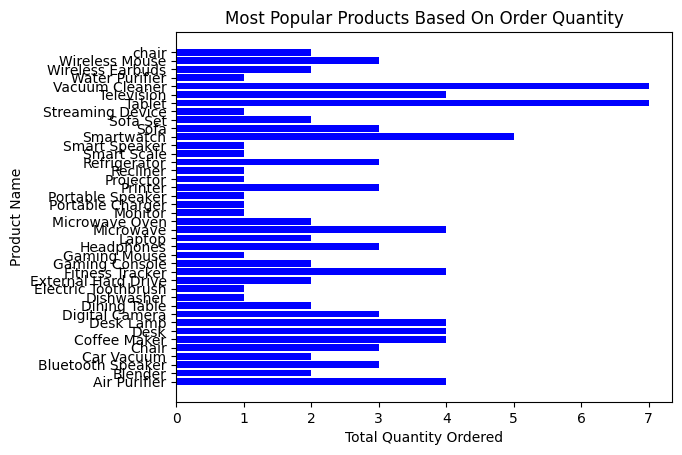

In [65]:
# Most Popular Products Based On Order Quantity  (By Merged Order table and Product Table)
merged_df = order_data.merge(product_data, on='product_id')
popular_df = merged_df.groupby('product_name')['quantity'].sum().reset_index()
print(popular_df)
popular_products = popular_products.sort_values(by='quantity') 
plt.barh(popular_df['product_name'], popular_df['quantity'], color='blue') # Plot the horizontal bar chart(barh)
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Product Name")
plt.title("Most Popular Products Based On Order Quantity")

  product_name  total_revenue
5        chair          800.0
0      Blender          900.0
1        Chair        45000.0
2         Desk        50000.0
4   Television        50000.0
3       Laptop       110000.0


Text(0.5, 1.0, 'Total Revenue Generated From Order')

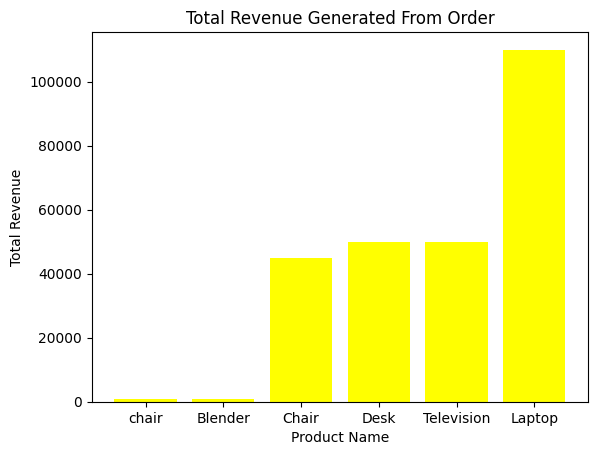

In [88]:
# Total Revenue Generated From Order
merged_df = order_data.merge(product_data, on='product_id').head(10) # Merge product and order data 
merged_df['total_revenue'] = merged_df['selling_price'] * merged_df['quantity'] # Calculating total revenue for each product

# Group by product and sum the total revenue
revenue_per_product = merged_df.groupby('product_name')['total_revenue'].sum().reset_index()
revenue_per_product = revenue_per_product.sort_values(by='total_revenue')
print(revenue_per_product)
plt.bar(revenue_per_product['product_name'], revenue_per_product['total_revenue'], color='yellow')
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Generated From Order")